# Dimensionaliteitsreductie

In [1]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

1. Covariance
2. Orthogonality
3. Eigenvalues and eigenvectors
4. Eigenvalue decomposition
5. Dimensionality reduction techniques
6. Principal component analysis
7. PCA for MNIST
8. PCA for images
9. PCA exercise for penguin data

## 1 Covariance
In the previous notebooks you have learned about "correlation". Two variables are correlated if there is a linear relationship between them. "Covariance" is a very similar concept. There are a few differences between correlation and covariance.
1. The Pearson correlation coefficient ranges from -1 to +1. The covariance value ranges from $-\infty$ to $+\infty$.
2. The correlation coefficient is not affected by scaling the values of the variables. The covariance value changes if the values are scaled.

We can calculate the covariance between variables using the equation:

In [2]:
Image(url='https://www.gstatic.com/education/formulas2/472522532/en/covariance_formula.svg', width=600)

Here, $N$ is the length of the dataset, $\bar{x}$ and $\bar{y}$ are the mean of $x$ and $y$ respectively.

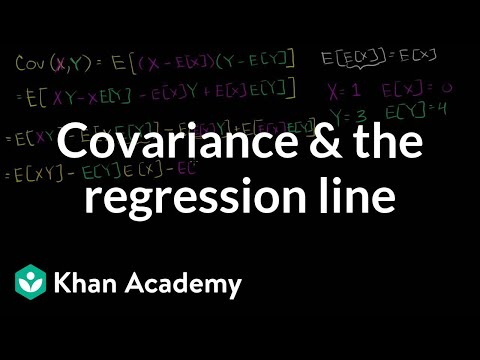

In [3]:
YouTubeVideo("ualmyZiPs9w", width=800, height=500)

The video above explains covariance in the context of regression. Don't worry if you do not understand all of it just yet. The important thing to understand is the meaning of covariance between two variables, as we will be using this concept later in this notebook.

### 1.1 Covariance in Python & numpy

Let us calculate the covariance between two variables in a dataset, first using basic Python functions and then using specific methods of numpy. For this example we will be using the **shoe size vs height** dataset from the regression & correlation notebook.

In [2]:
# Loading necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

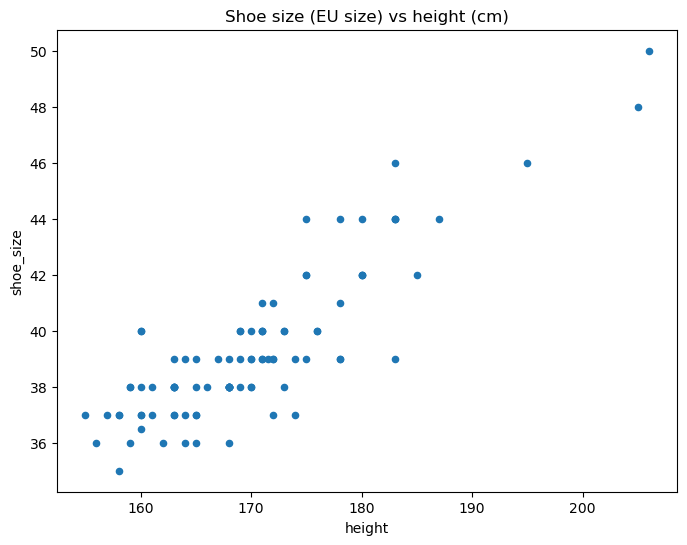

In [3]:
height_shoe_df = pd.read_csv('wo_men.csv')

height_shoe_df_clean = height_shoe_df[(height_shoe_df['height'] > 100) & (height_shoe_df['height'] < 250)].dropna()
height_shoe_df_clean.plot.scatter(x='height', y='shoe_size', figsize=(8,6))
plt.title("Shoe size (EU size) vs height (cm)")
plt.show()

In [4]:
# Calculate covariance between shoe size and height from scratch

mean_shoesize = np.mean(height_shoe_df_clean['shoe_size'])
mean_height = np.mean(height_shoe_df_clean['height'])

cov = np.sum( (height_shoe_df_clean['shoe_size'] - mean_shoesize) * (height_shoe_df_clean['height'] - mean_height)) / (len(height_shoe_df_clean) - 1)

print(f"The covariance value of height and shoe size is {cov}")

The covariance value of height and shoe size is 22.098124300111976


In [5]:
# Calculate covariance between shoe size and height using numpy

cov_np = np.cov(height_shoe_df_clean['shoe_size'], height_shoe_df_clean['height'])[1][0] # Selecting top-right entry from the matrix

print(f"The covariance value of height and shoe size is {cov_np}")

The covariance value of height and shoe size is 22.09812430011197


In [6]:
# Calculate covariance between shoe size and height using pandas built-in method

cov_pd = height_shoe_df_clean['shoe_size'].cov(height_shoe_df_clean['height'])

print(f"The covariance value of height and shoe size is {cov_pd}")

The covariance value of height and shoe size is 22.09812430011197


**Note:** The covariance between two variables is not scale independent. Scaling up or scaling down one of the variables changes the value of the covariance. Here is a demonstration of this:

In [7]:
# Add a column to scale the values of one of the variables
height_shoe_df_clean['double_shoe_size'] = 2 * height_shoe_df_clean['shoe_size']

# Calculate the correlation between the unscaled variables
corr_unscaled = np.corrcoef(height_shoe_df_clean['height'], height_shoe_df_clean['shoe_size'])[0,1]
print(f"The correlation coefficient between the unscaled variables is {corr_unscaled}\n")

# Calculate the covariance between the unscaled variables
cov_unscaled = np.cov(height_shoe_df_clean['height'], height_shoe_df_clean['shoe_size'])[1,0]
print(f"The covariance between the unscaled variables is {cov_unscaled}\n")

# Calculate the correlation between the scaled variables
corr_scaled = np.corrcoef(height_shoe_df_clean['height'], height_shoe_df_clean['double_shoe_size'])[0,1]
print(f"The correlation coefficient between the scaled variables is {corr_scaled}\n")

# Calculate the covariance between the scaled variables
cov_scaled = np.cov(height_shoe_df_clean['height'], height_shoe_df_clean['double_shoe_size'])[1,0]
print(f"The covariance between the scaled variables is {cov_scaled}\n")

The correlation coefficient between the unscaled variables is 0.8612402455211131

The covariance between the unscaled variables is 22.09812430011197

The correlation coefficient between the scaled variables is 0.8612402455211131

The covariance between the scaled variables is 44.19624860022394



### 1.1 Covariance matrix

In the notebook on correlation, you learned about the correlation coefficient matrix. This is a matrix that shows the correlation between each pair of variables in your dataset. The covariance matrix is exactly the same, but with covariance values instead of correlation coefficients.

In [8]:
height_shoe_df_clean.cov()

,height,shoe_size,double_shoe_size
height,88.523236,22.098124,44.196249
shoe_size,22.098124,7.437122,14.874244
double_shoe_size,44.196249,14.874244,29.748488


Make a note of this, since calculating the covariance matrix is the first step in the Principal Component decomposition process.

In [9]:
height_shoe_df_clean.describe()

,height,shoe_size,double_shoe_size
count,95.000000,95.000000,95.000000
mean,170.026316,39.310526,78.621053
std,9.408679,2.727109,5.454217
min,155.000000,35.000000,70.000000
25%,163.000000,38.000000,76.000000
50%,169.000000,39.000000,78.000000
75%,174.500000,40.000000,80.000000
max,206.000000,50.000000,100.000000


## 2 Orthogonality and orthonormal bases+

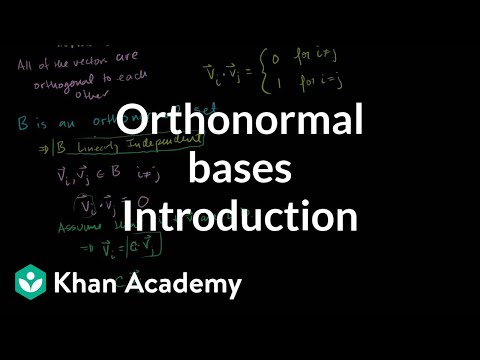

In [11]:
YouTubeVideo("7BFx8pt2aTQ", width=800, height=500)

Two vectors are **orthogonal** if their dot product is 0. Two vectors are **orthonormal** if their dot product is 0 and their lengths are both 1. What does this mean practically? Let's assume we have a vector $\vec{a}$, in two dimensions. We know that the two axes in this 2-D vector space are orthogonal to each other. We are able to represent our vector $\vec{a}$ as the sum of two components, one along the x-axis and one along the y-axis. In other words, we can **project** our vector $\vec{a}$ along two other vectors, that are orthogonal to each other. Visually, this is what it would look like:

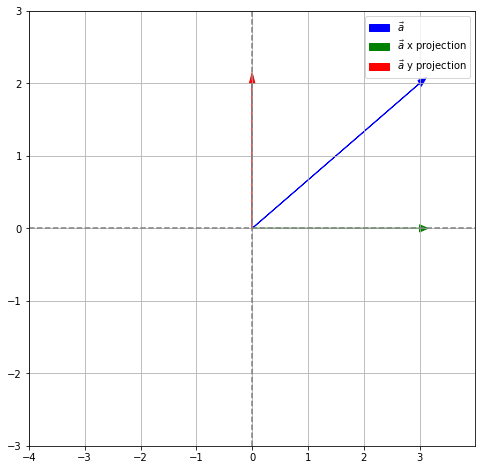

In [12]:
plt.figure(figsize=(8,8))

a = np.array([3, 2])

vec_a = plt.arrow(0, 0, a[0], a[1], color='blue', head_width=0.1) # Plot the first vector
vec_ax = plt.arrow(0, 0, a[0], 0, color='green', head_width=0.1) # Plot the projections
vec_ay = plt.arrow(0, 0, 0, a[1], color='red', head_width=0.1) # Plot the projections

# Add axes
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.axvline(x = 0, color = 'gray', linestyle = '--')

# Set axis limits
plt.xlim([-4, 4])
plt.ylim([-3, 3])

# Show the grid
plt.xticks(np.arange(-4, 4))
plt.grid()

# Show the legend
plt.legend([vec_a, vec_ax, vec_ay], [r'$\vec{a}$', r'$\vec{a}$ x projection', r'$\vec{a}$ y projection'], loc='upper right')

These two projected vectors contain all of the information necessary to rebuild the original vector $\vec{a}$. Now imagine, you had another vector $\vec{b}$. The projection of this vector on the x-axis is extremely large compared to its projection on the y-axis. If we were to once again decompose this vector into its components, and then remove the shorter vector, we have lost a bit of information about the original vector. We know longer have its original length and direction. We are no longer able to perfectl reconstruct the orginal vector. However, we have converted this vector from a 2-dimensional vector to a 1-dimensional vector. And since the x-projection had much more information about the original vector in any case, we still have a roughly good estimate of the original vector $\vec{b}$ from just its x-projection.

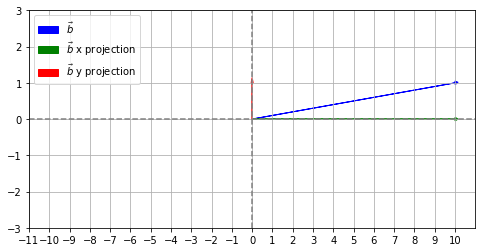

In [13]:
plt.figure(figsize=(8,4))

b = np.array([10, 1])

vec_b = plt.arrow(0, 0, b[0], b[1], color='blue', head_width=0.1) # Plot the first vector
vec_bx = plt.arrow(0, 0, b[0], 0, color='green', head_width=0.1) # Plot the projections
vec_by = plt.arrow(0, 0, 0, b[1], color='red', head_width=0.1) # Plot the projections

# Add axes
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.axvline(x = 0, color = 'gray', linestyle = '--')

# Set axis limits
plt.xlim([-11, 11])
plt.ylim([-3, 3])

# Show the grid
plt.xticks(np.arange(-11, 11))
plt.grid()

# Show the legend
plt.legend([vec_b, vec_bx, vec_by], [r'$\vec{b}$', r'$\vec{b}$ x projection', r'$\vec{b}$ y projection'], loc='upper left');

Now, think about what information a covariance matrix contains. Each element of the covariance matrix gives you a measure of the variance between two features in your dataset. What if we were able to transform the feature-space of the dataset, such that our data is now projected in an orthogonal vector space? What if we used the covariance information in our covariance matrix to determine the directions of the basis vectors in this orthogonal vector space? Now the lengths of our projected vectors will correspond to the amount of variance in the original dataset. This means that the projected vectors with the longest lengths will explain the greatest amount of variance in our data, and the projected vectors with the shortest lengths will explain the least amount of variance in our data. Are you starting to see where we are going with this?

## 3 Eigenvalues and Eigenvectors

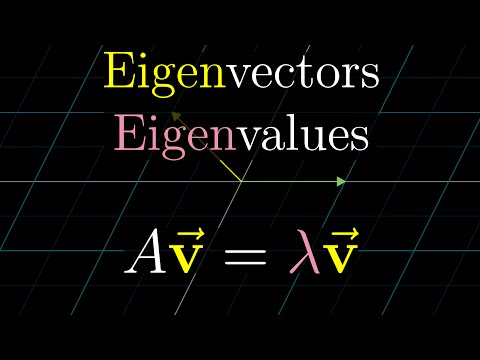

In [15]:
YouTubeVideo("PFDu9oVAE-g", width=800, height=500)

In order to project our covariance matrix on an orthogonal basis, we must first understand Eigenvalues and Eigenvectors. For a
given matrix $A$, if there exists a vector $\vec{v}$ and a constant $\lambda$ such that $A\vec{v} = \lambda\vec{v}$, then the vector $\vec{v}$ is said to be an **Eigenvector** of the matrix $A$, and the constant (scalar) value $\lambda$ is the corresponding **Eigenvalue** for this particular matrix and Eigenvector. One important requirement here is that $A$ is a square matrix (equal number of rows and columns).

This may sound complicated, but it becomes easier to understand when you remember that matrix multiplications with a vector can be considered as transformations on the vector. When the transormation in this case *only* results in a scaling-up or scaling-down of the original vector (so no rotations or reflections), then this vector is an Eigenvector of the transformation matrix, and the factor by which it gets scaled up or down by is the Eigenvalue.

The question is - why does this matter? A matrix contains a lot of data. If we have a $100 \times 100$ matrix, it contains $10000$ elements. This matrix can be multiplied with vectors in a 100-dimensional space. In the case of an Eigenvector, this mmultiplication results in just a single factor being multiplied with the vector. In other words, as far as the Eigenvector is concerned, we can replace *10000 values with just one single value!* This is a massive compression of data, while preserving the relevant information, as far as the Eigenvector is concerned. We can think about this as *projecting* the data in the matrix along an axis given by the Eigenvector.

Now, let's say we have a matrix of shape $m \times m$. If we could find $m$ different Eigenvectors of this matrix, and if by some coincidence, all these Eigenvectors were orthogonal to each other, then we could project this matrix along $m$ different axes. Now instead of $m \times m$ values of a matrix, we simply have $m$ different Eigenvalues that correspond to $m$ orthogonal vectors that span the vector space of this matrix. Luckily for us, there is a special property in linear algebra called [Spectral theorem](https://en.wikipedia.org/wiki/Spectral_theorem), which states that all symmetric, real-valued matrices with shape $m \times m$ have $m$ orthogonal Eigenvectors! How lucky for us, because the covariance matrix that we talked about is symmetric (the matrix is equal to its transpose) and has real values (there are no [complex numbers](https://en.wikipedia.org/wiki/Complex_number) in the matrix). This means that the covariance matrix can be projected along an orthogonal basis! 

In [14]:
# Performing Eigenvector decomposition in numpy

A = np.array([
    [1, 2],
    [4, 5]
])

eigenvals, eigenvecs = np.linalg.eig(A)

print("EIGENVALUES")
print(eigenvals)
print("\nEIGENVECTORS")
print(eigenvecs)

EIGENVALUES
[-0.46410162  6.46410162]

EIGENVECTORS
[[-0.80689822 -0.34372377]
 [ 0.59069049 -0.9390708 ]]


Each column in the "Eigenvectors" matrix in the above code corresponds to an Eigenvector. We can verify that these vectors are indeed Eigenvectors, by multiplying the matrix with them and seeing how the vectors transform.

In [15]:
first_eigenvec = eigenvecs[:,0] # Select first column
second_eigenvec = eigenvecs[:,1] # Select second column

print(f"First eigenvector is {first_eigenvec}\n")
print(f"Second eigenvector is {second_eigenvec}\n")

result_1 = A@first_eigenvec
result_2 = A@second_eigenvec

scale_factors_1 = result_1 / first_eigenvec
scale_factors_2 = result_2 / second_eigenvec

print(f"Result of matrix multiplication of A with the first eigenvector scales the vector by these factors: {scale_factors_1}")
print(f"Result of matrix multiplication of A with the second eigenvector scales the vector by these factors: {scale_factors_2}")

First eigenvector is [-0.80689822  0.59069049]

Second eigenvector is [-0.34372377 -0.9390708 ]

Result of matrix multiplication of A with the first eigenvector scales the vector by these factors: [-0.46410162 -0.46410162]
Result of matrix multiplication of A with the second eigenvector scales the vector by these factors: [6.46410162 6.46410162]


## 4 Principal Component Analysis (PCA)

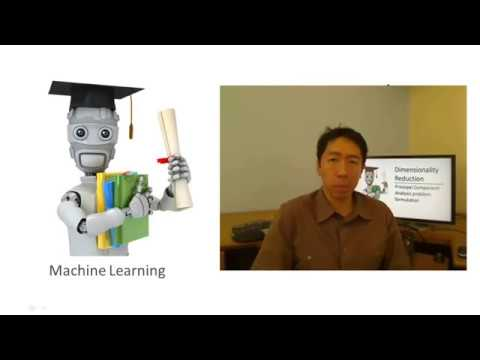

In [18]:
YouTubeVideo("T-B8muDvzu0", width=800, height=500)

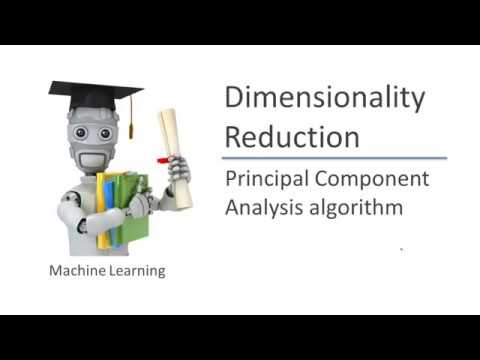

In [19]:
YouTubeVideo("rng04VJxUt4", width=800, height=500)

And here, we finally come to the core of this notebook. If we have a dataset of features, and we calculate the covariance matrix of these features, we can project this covariance matrix on an orthogonal basis of Eigenvectors. This is called **Principal Component Decomposition**. Once this decomposition has been performed, this is the most important thing to know: **The eigenvector of the covariance matrix with the largest eigenvalue is the direction along which the data set has the maximum variance.**

Similarly, the projection with the second-largest Eigenvalue is the direction along which the data set has the second-largest variance, and so on. If we have a dataset with hundreds or thousands of features, we could simply perform Principal Component Decomposition, and **remove** the Eigenvectors with the smallest Eigenvalues, that is the directions that explain the least amount of variance. We can then reconstruct the dataset, but this time from a much reduced number of projections, and we will be left with far fewer features, but these new features will explain most of the variance in our data. We can analyse these new features, or train machine learning algorithms on these new features, instead of using the entire dataset, and this might make our training/analysis much easier or faster. This is called **Principal Component Analysis**.

In [19]:
Image(url='https://assets.website-files.com/5e6f9b297ef3941db2593ba1/5f76ef7799e20652be0d79f6_Screenshot%202020-10-02%20at%2011.12.32.png', width=600)

### 4.1 Steps involved in PCA

For this example, you will be working with the famous [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). The dataset contains tabular information about 3 different sub-species of the iris flower. Our goal is to use PCA to reduce this dataset and try to visualize the principal components with the highest variance.

### 4.1.1 Importing the dataset

The iris dataset is available in scikit learn.

In [72]:
from sklearn import datasets

# import iris data
iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target

In [73]:
type(iris)

sklearn.utils.Bunch

In [74]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 4.1.2 Standardize the data

Before we start with PCA we must first standardize the data so that each feature has a mean of 0 and a variance of 1. This is important, because as we have seen, the covariance matrix is not scale-invariant, and changes in scale in different features will result in incorrect decompositions.

In [75]:
X_std = pd.DataFrame()

for col in X:
    X_std[col] = (X[col] - X[col].mean()) / X[col].std()

In [76]:
X_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


### 4.1.3 Calculate covariance matrix

The next step is to calculate the covariance matrix of the standardized feature columns.

In [77]:
cov_std = X_std.cov()

In [78]:
cov_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [79]:
# Converting this to a numpy array for the next step

cov_std_matrix = cov_std.to_numpy()
cov_std_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

### 4.1.4 Calculate eigenvector decomposition of covariance matrix

The next step is to decompose this matrix into its Eigenvectors and Eigenvalues.

In [80]:
eigenvals, eigenvecs = np.linalg.eig(cov_std_matrix)

print(f"The magnitudes of the projections are: {eigenvals}")
print(f"The vectors of the projections are: {eigenvecs}")

The magnitudes of the projections are: [2.91849782 0.91403047 0.14675688 0.02071484]
The vectors of the projections are: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Usually the next step would be to arrange the eigenvectors in descending order of their eigenvalues. We are luck because numpy automatically does it for us.

Text(0, 0.5, 'Magnitude of eigenvalue')

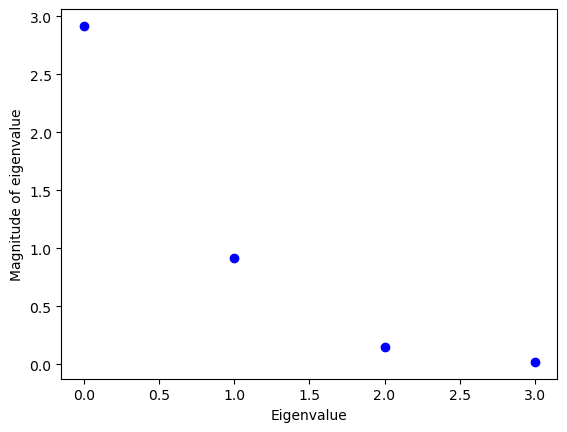

In [81]:
# Plotting the eigenvalues

plt.plot(eigenvals, 'bo')
plt.xlabel("Eigenvalue")
plt.ylabel("Magnitude of eigenvalue")

Looking at the plot above, how many Eigenvalues do you think we need to represent the greatest amount of variance in our data? So how many principal components should we select?

### 4.1.4 Select the most relevant eigenvectors and transform the data using these eigenvectors

The next step is the reverse of projection. But in this case we do not use all the projections to reconstruct the data, but just the projections that explain the most variance.

In [82]:
pca_data = X_std@eigenvecs

In [83]:
pca_data

,0,1,2,3
0,-2.257141,-0.478424,-0.127280,0.024088
1,-2.074013,0.671883,-0.233826,0.102663
2,-2.356335,0.340766,0.044054,0.028282
3,-2.291707,0.595400,0.090985,-0.065735
4,-2.381863,-0.644676,0.015686,-0.035803
...,...,...,...,...
145,1.864258,-0.385674,0.255418,0.387957
146,1.559356,0.893693,-0.026283,0.219457
147,1.516091,-0.268171,0.179577,0.118773
148,1.368204,-1.007878,0.930279,0.026041


In [84]:
# Selecting only the top 2 principal components and adding this to our original dataset

X['PCA 1'] = pca_data[0]
X['PCA 2'] = pca_data[1]
X["PCA 3"] = pca_data[2]

<AxesSubplot:xlabel='PCA 1', ylabel='PCA 2'>

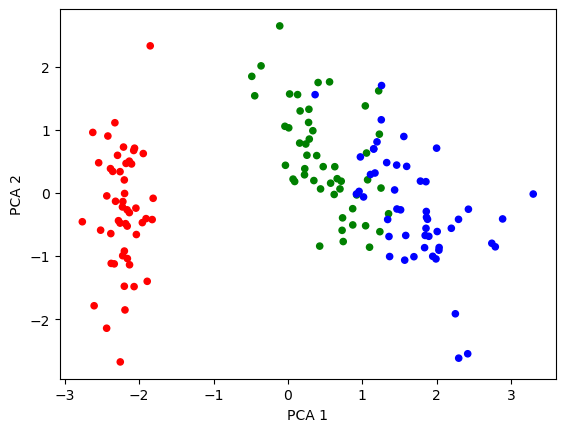

In [85]:
# Plotting pca data and coloring it according to the labels

X['color'] = ['r' if l == 0 else 'g' if l == 1 else 'b' for l in y]

X.plot.scatter(x='PCA 1', y='PCA 2', c='color')

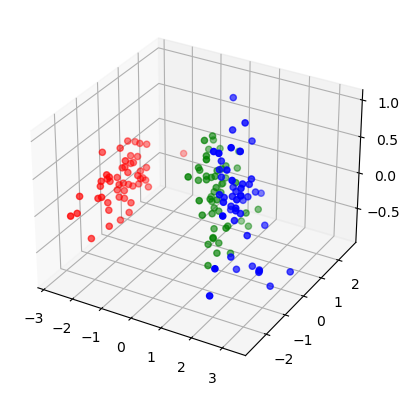

In [88]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['PCA 1'], X['PCA 2'], X['PCA 3'], c=X['color'])
plt.show()


Can you clearly see the different categories here? In this example we managed to reduce the number of features from 4 to just 2, so we could actually visualize them!

### 4.2 PCA with scikit-learn

All the steps we performed until now can be done in a single line of code in scikit-learn.

<AxesSubplot:xlabel='PCA 1', ylabel='PCA 2'>

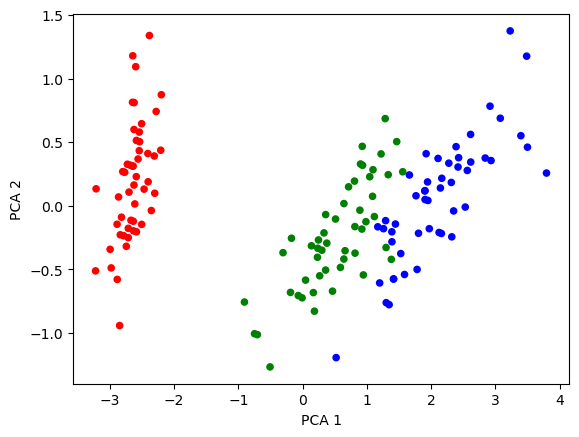

In [47]:
from sklearn.decomposition import PCA

iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target

pca_data_sklearn = PCA(n_components=2).fit_transform(X)

X['PCA 1'] = pca_data_sklearn[:, 0]
X['PCA 2'] = pca_data_sklearn[:, 1]

X['color'] = ['r' if l == 0 else 'g' if l == 1 else 'b' for l in y]

X.plot.scatter(x='PCA 1', y='PCA 2', c='color')

## 5 Exercises
For these exercises you will be using the penguins dataset. This dataset contains data about different species of penguins. The species column has been removed on purpose, so you don't see how many penguin species are actually present in the dataset. Your goal is to use dimensionality reduction techniques to be able to visualize the variables, and based on this **visual** analysis, to predict how many species there are in the dataset. 

In [113]:
penguins_data = pd.read_csv('penguins_unlabeled.csv')

### Question 1: Inspect the dataset. How many feature columns do we have?

In [114]:
penguins_data.head()
del penguins_data["Unnamed: 0"]

In [115]:
len(penguins_data.columns)

16

In [116]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Question 2: The dataset has missing values, some of the columns are non-numeric or dates. Clean up this dataset as best as you can, keeping in mind we need numeric values to do PCA.

In [117]:
penguins_data.columns = penguins_data.columns.str.replace(" ","_").str.lower()
print(penguins_data.isna().sum())
del penguins_data["comments"]

studyname                0
sample_number            0
region                   0
island                   0
stage                    0
individual_id            0
clutch_completion        0
date_egg                 0
culmen_length_(mm)       2
culmen_depth_(mm)        2
flipper_length_(mm)      2
body_mass_(g)            2
sex                     10
delta_15_n_(o/oo)       14
delta_13_c_(o/oo)       13
comments               318
dtype: int64


In [118]:
penguins_data = penguins_data.dropna()

In [119]:
print(penguins_data.studyname.unique()) # keep 1-3
penguins_data["studyname"] = penguins_data["studyname"].replace({"PAL0708":1, "PAL0809":2, "PAL0910":3})

['PAL0708' 'PAL0809' 'PAL0910']


In [120]:
penguins_data.region.unique() # remove
del penguins_data["region"]

In [121]:
penguins_data.island.unique() # keep 1-3
penguins_data["island"] = penguins_data["island"].replace({"Torgersen":1, "Biscoe":2, "Dream":3})

In [122]:
penguins_data.stage.unique() # remove
del penguins_data["stage"]

In [123]:
penguins_data.clutch_completion.unique() # keep 0-1
penguins_data["clutch_completion"] = penguins_data["clutch_completion"].replace({"Yes":1, "No":0})

In [124]:
penguins_data.columns

Index(['studyname', 'sample_number', 'island', 'individual_id',
       'clutch_completion', 'date_egg', 'culmen_length_(mm)',
       'culmen_depth_(mm)', 'flipper_length_(mm)', 'body_mass_(g)', 'sex',
       'delta_15_n_(o/oo)', 'delta_13_c_(o/oo)'],
      dtype='object')

In [125]:
penguins_data = penguins_data.drop(["individual_id", "date_egg", "sex", "island","studyname","clutch_completion","sample_number"], axis=1)

In [42]:
penguins_data.sex.unique()
penguins_data[penguins_data.sex == "."]
penguins_data = penguins_data.drop(336)

In [127]:
# LE=LabelEncoder()
# penguins_data["sex"]=penguins_data[["sex"]].apply(LE.fit_transform)

In [128]:
ds = penguins_data.copy()
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns= ds.columns )

display(penguins_data.head(), scaled_ds.head())

,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g),delta_15_n_(o/oo),delta_13_c_(o/oo)
1,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,40.3,18.0,195.0,3250.0,8.36821,-25.33302
4,36.7,19.3,193.0,3450.0,8.76651,-25.32426
5,39.3,20.6,190.0,3650.0,8.66496,-25.29805
6,38.9,17.8,181.0,3625.0,9.18718,-25.21799


,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g),delta_15_n_(o/oo),delta_13_c_(o/oo)
0,-0.833626,0.141077,-1.094779,-0.515098,0.383822,1.262138
1,-0.687208,0.446745,-0.449299,-1.196116,-0.669863,0.452789
2,-1.346090,1.109025,-0.592739,-0.948473,0.052047,0.463893
3,-0.870231,1.771306,-0.807899,-0.700830,-0.132010,0.497118
4,-0.943440,0.344856,-1.453380,-0.731785,0.814503,0.598603


### Question 3: Perform PCA on the feature columns. How many PCA components do you need to reasonably represent the data? 

In [129]:
cov_std = scaled_ds.cov()
cov_std

,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g),delta_15_n_(o/oo),delta_13_c_(o/oo)
culmen_length_(mm),1.003086,-0.223610,0.649947,0.593140,-0.057295,0.188825
culmen_depth_(mm),-0.223610,1.003086,-0.577630,-0.472592,0.602197,0.422118
flipper_length_(mm),0.649947,-0.577630,1.003086,0.879991,-0.505334,-0.377949
body_mass_(g),0.593140,-0.472592,0.879991,1.003086,-0.542761,-0.374163
delta_15_n_(o/oo),-0.057295,0.602197,-0.505334,-0.542761,1.003086,0.571848
delta_13_c_(o/oo),0.188825,0.422118,-0.377949,-0.374163,0.571848,1.003086


In [130]:
cov_std_matrix = cov_std.to_numpy()

In [131]:
eigenvals, eigenvecs = np.linalg.eig(cov_std_matrix)

In [132]:
eigenvals, eigenvecs

(array([3.34694613, 1.46418486, 0.09915322, 0.19319905, 0.54640257,
        0.36863269]),
 array([[ 0.28633765, -0.65977371, -0.16806181, -0.67193146,  0.03243002,
         -0.04382953],
        [-0.40951699, -0.18528553,  0.17374585, -0.09918066, -0.77664838,
          0.39339291],
        [ 0.50100523, -0.22159484,  0.7720232 ,  0.24095382, -0.14778822,
         -0.15482108],
        [ 0.4869952 , -0.19944339, -0.56852853,  0.52006522, -0.32758734,
          0.14849921],
        [-0.40835351, -0.36826743, -0.10402598,  0.25711119, -0.1451602 ,
         -0.77435616],
        [-0.30884209, -0.55305071,  0.10724597,  0.37952412,  0.4955192 ,
          0.44460314]]))

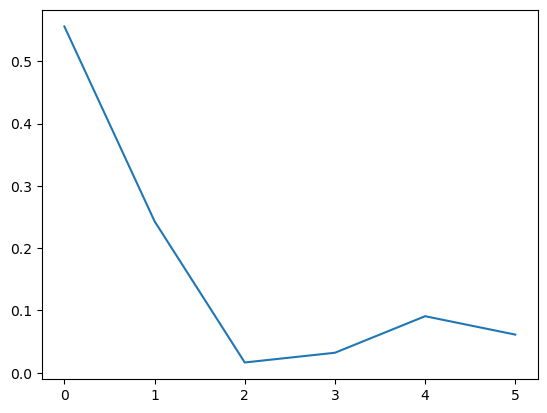

In [133]:
normalized = eigenvals / sum(eigenvals)
sum(normalized)
plt.plot(normalized)

In [134]:
normalized

array([0.55610797, 0.24327995, 0.01647469, 0.03210076, 0.09078689,
       0.06124974])

In [136]:
pca = PCA(n_components=2)
pca.fit(scaled_ds)
transformed = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,325.0,-2.705528e-16,1.829466,-3.114337,-1.500777,-0.832697,2.015741,3.69306
col2,325.0,-1.226369e-16,1.210035,-2.869281,-0.795841,-0.224883,0.770690,3.16404


### Question 4: Visualize the results of your PCA decomposition. Do you see a grouping between datapoints? How many groups do you see? Bonus question: run a clustering algorithm on your PCA-decomposed data to see if you can classify the datapoints into clusters.

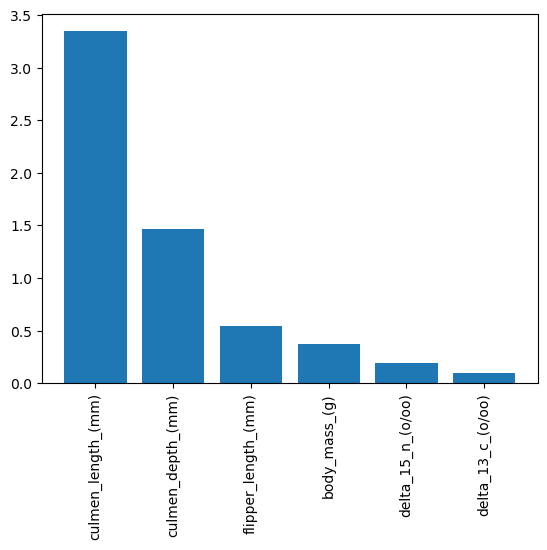

In [137]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_ds)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ )
plt.xticks(features, scaled_ds.columns, rotation=90)
plt.show()

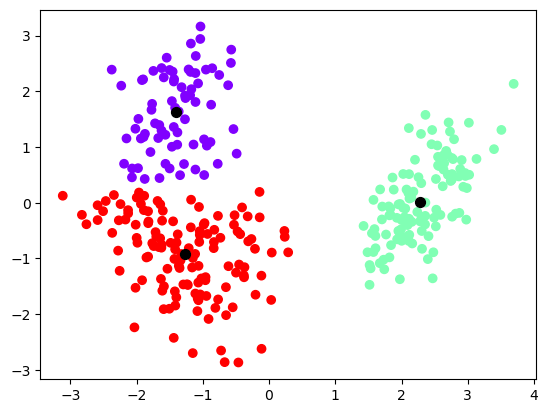

In [139]:
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_ds)

pca_df = pd.DataFrame(data = pca_components
             , columns = ['pca component 1', 'pca component 2'])


kmeans = KMeans(n_clusters=3, random_state=0, n_init=1)
y_pred = kmeans.fit_predict(pca_df)
plt.scatter(pca_df['pca component 1'], pca_df['pca component 2'], c=y_pred, cmap='rainbow')

# marking cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='o', s=50, c='black')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_ds)

pca_df = pd.DataFrame(data = pca_components
             , columns = ['pca component 1', 'pca component 2'])


kmeans = KMeans(n_clusters=3, random_state=0, n_init=1)
y_pred = kmeans.fit_predict(pca_df)


plt.scatter(pca_df['pca component 1'], pca_df['pca component 2'], c=[, cmap='rainbow')

# marking cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='o', s=50, c='black')
plt.show()

### Question 5: Import the penguins dataset with the species column. How many species are present in the dataset? Does it match your estimate from the previous question? Bonus question: check if your clustering model predictions match with the different penguin species.

In [145]:
penguins_labeled = pd.read_csv('penguins_lter.csv')

penguins_labeled.groupby("Species").sum()


,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,,
Adelie Penguin (Pygoscelis adeliae),11628,5857.5,2770.3,28683.0,558800.0,1249.22232,-3638.39132
Chinstrap penguin (Pygoscelis antarctica),2346,3320.7,1252.6,13316.0,253850.0,626.86237,-1669.16486
Gentoo penguin (Pygoscelis papua),7750,5843.1,1842.8,26714.0,624350.0,1005.93127,-3194.60632


In [147]:
penguins_labeled.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [148]:
pl = penguins_labeled.drop(['Comments'], axis=1)

In [149]:
pl = pl.dropna()

In [150]:
len(pl)

325

In [151]:
LE=LabelEncoder()
pl["spec"]=pl[["Species"]].apply(LE.fit_transform)

In [153]:
y_test = ['r' if l == 0 else 'g' if l == 1 else 'b' for l in pl['spec']]

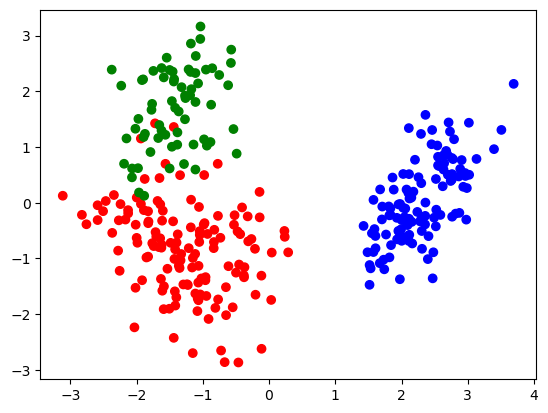

In [154]:
plt.scatter(pca_df['pca component 1'], pca_df['pca component 2'], c=y_test, cmap='rainbow')